### Importar bibliotecas; 
### Puxar base de dados; 
### Análise inicial;

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('./assets/exportacoes_franca.csv', sep=',')

display(df)

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
1,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),79360,14150
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
3,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),69412,9385
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600
...,...,...,...,...,...,...,...,...,...,...,...
142355,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",European Union (EU),2316,4
142356,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400
142357,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,European Union (EU),27060,26400
142358,2020,12,France,Xapuri - AC,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,31111,23045


## Informações Gerais

### Quantas linhas têm a tabela? Existe algum valor vazio que deveria ser tratado?

A tabela tem 142.360 linhas

Não existe valores vazios a serem tratados

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142360 entries, 0 to 142359
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             142360 non-null  int64 
 1   Month            142360 non-null  int64 
 2   Country          142360 non-null  object
 3   City             142360 non-null  object
 4   SH4 Code         142360 non-null  int64 
 5   SH4 Description  142360 non-null  object
 6   SH2 Code         142360 non-null  int64 
 7   SH2 Description  142360 non-null  object
 8   Economic Block   142360 non-null  object
 9   US$ FOB          142360 non-null  int64 
 10  Net Weight       142360 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 11.9+ MB


None

In [2]:
# Verificando se há valores vazios
valores_vazios = df.isnull().values.any()
print(f"O DataFrame tem valores vazios: {valores_vazios}")

O DataFrame tem valores vazios: False


## Como foi a evolução das exportações para a frança ao longo dos anos?

Crie uma tabela com os anos de 2016, 2017, 2018, 2019 e 2020 e o valor US$ de exportações

### Analisando o Gráfico, podemos notar que os melhores anos de exportação foram de 2018 e 2019, sendo que 2020 o pior ano dentre os 5

,Year,US$ FOB,US$ FOB Formatado
0,2016,4615500082,"US$ 4,615,500,082"
1,2017,4448705456,"US$ 4,448,705,456"
2,2018,5239424416,"US$ 5,239,424,416"
3,2019,5218723612,"US$ 5,218,723,612"
4,2020,3967594810,"US$ 3,967,594,810"


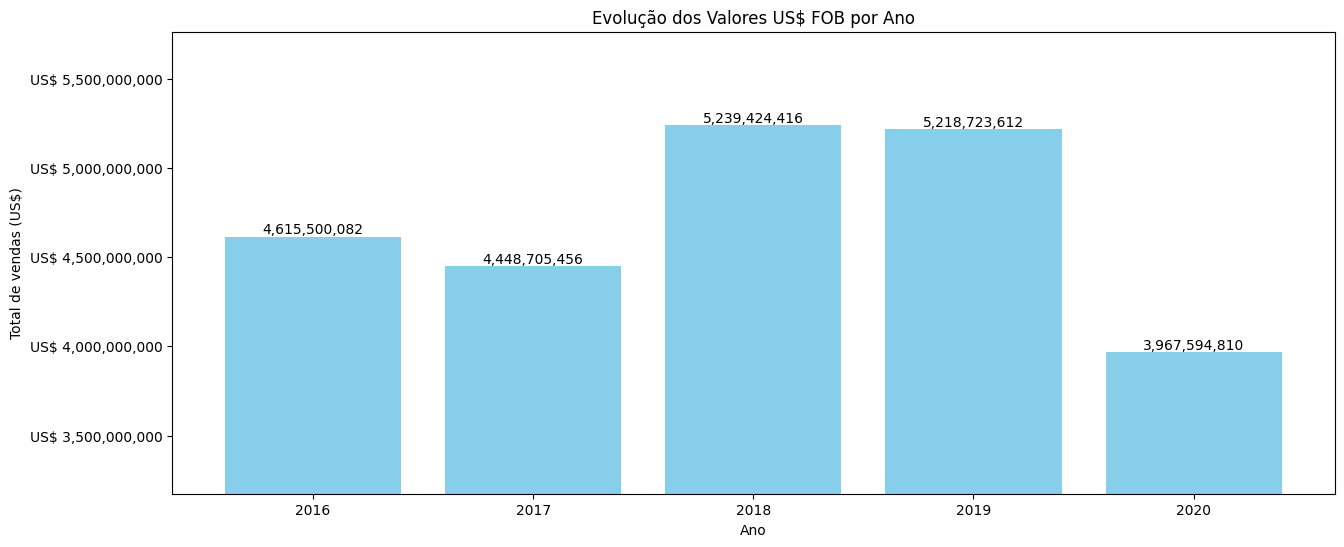

In [55]:
evolucao_df = df.groupby('Year')['US$ FOB'].sum().reset_index()
evolucao_df['US$ FOB Formatado'] = evolucao_df['US$ FOB'].map('US$ {:,}'.format)
display(evolucao_df)

plt.figure(figsize=(15, 6))
bars = plt.bar(evolucao_df['Year'], evolucao_df['US$ FOB'], color='skyblue')

plt.xlabel('Ano')
plt.ylabel('Total de vendas (US$)')
plt.title('Evolução dos Valores US$ FOB por Ano')

ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'US$ {x:,.0f}'))

# Eixo Y do gráfico
y_max = evolucao_df['US$ FOB'].max() * 1.1  # 10% acima do valor máximo para espaço extra
y_min = evolucao_df['US$ FOB'].min() * 0.8  # 20% abaixo do valor mínimo para espaço extra
plt.ylim(y_min, y_max)

# Adicionando rótulos de valores formatados nas barras
for bar, value in zip(bars, evolucao_df['US$ FOB']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{value:,.0f}', ha='center', va='bottom')

plt.show()

### Quais os produtos mais exportados ao longo de todo o período?

Queremos saber os produtos com maior valor US$ de exportação

### Os 3 produtos mais exportados foram:

1 - Residues and waste from the food industries; others - US$ 5,641,498,484

2 - Ores, slag and ash - US$ 3,404,353,274

3 - Nuclear reactors, boilers, machinery and mechanical appliances; others - US$ 1,889,781,694

In [57]:
more_exported_products_df = df.groupby('SH2 Description')['US$ FOB'].sum().reset_index()
more_exported_products_df['US$ FOB Formatado'] = more_exported_products_df['US$ FOB'].map('US$ {:,}'.format)
more_exported_products_df = more_exported_products_df.sort_values(by='US$ FOB', ascending=False)

pd.set_option('display.max_colwidth', None)

more_exported_products_df = more_exported_products_df.head(10)
display(more_exported_products_df)

,SH2 Description,US$ FOB,US$ FOB Formatado
75,Residues and waste from the food industries; others,5641498484,"US$ 5,641,498,484"
57,"Ores, slag and ash",3404353274,"US$ 3,404,353,274"
54,"Nuclear reactors, boilers, machinery and mechanical appliances; others",1889781694,"US$ 1,889,781,694"
72,"Pulp of wood or of other fibrous cellulosic material, others,",1855424642,"US$ 1,855,424,642"
0,"Aircraft, spacecraft, and parts thereof",1253007710,"US$ 1,253,007,710"
17,"Coffee, tea, maté and spices",1200127040,"US$ 1,200,127,040"
46,"Mineral fuels, mineral oils, bituminous substances; mineral waxes",984374882,"US$ 984,374,882"
93,Wood and articles of wood; wood charcoal,833385980,"US$ 833,385,980"
55,"Oil seeds and oleaginous fruits; Grains, Seeds, others",664218888,"US$ 664,218,888"
29,"Footwear, gaiters and the like; parts of such articles",585474508,"US$ 585,474,508"


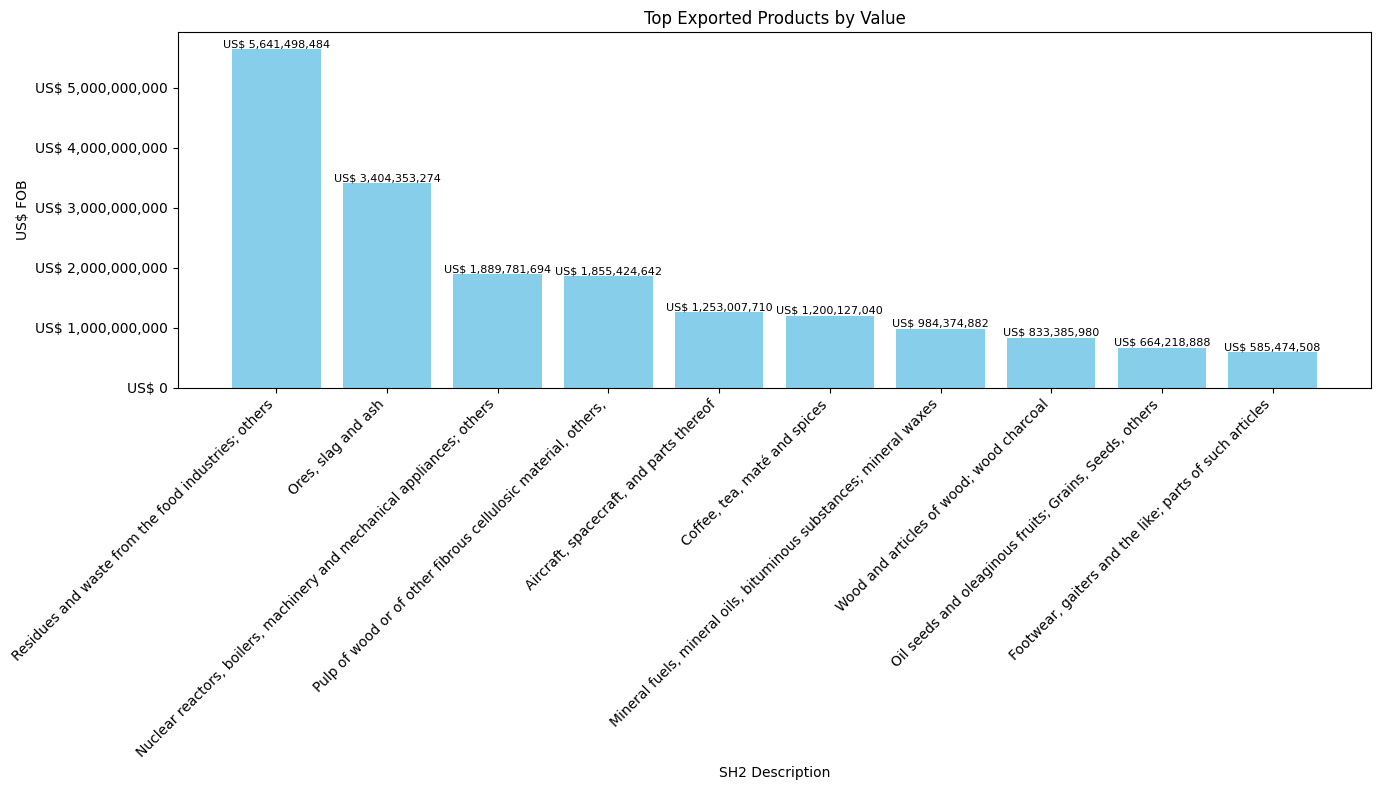

In [58]:
plt.figure(figsize=(14, 8))
bars = plt.bar(more_exported_products_df['SH2 Description'], more_exported_products_df['US$ FOB'], color='skyblue')

plt.xlabel('SH2 Description')
plt.ylabel('US$ FOB')
plt.title('Top Exported Products by Value')

ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'US$ {x:,.0f}'))

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionando rótulos de valores formatados nas barras
for bar, value in zip(bars, more_exported_products_df['US$ FOB']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'US$ {value:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### Em 2020 qual cidade mais exportou para a França?
Em valores US$

## A cidade que mais exportou em 2020 foi Duque de Caxias - RJ => com:	US$ 279,405,596

In [61]:
df_2020 = df[df['Year'] == 2020]
# OU #
# df_2020 = df.loc[df['Year'] == 2020, :]

cidade_mais_exportou_2020 = df_2020.groupby('City')['US$ FOB'].sum().reset_index()

cidade_mais_exportou_2020 = cidade_mais_exportou_2020.sort_values('US$ FOB', ascending=False)
cidade_mais_exportou_2020 = cidade_mais_exportou_2020.head(5) # 5 cidades que mais exportaram #

cidade_mais_exportou_2020['US$ FOB']= cidade_mais_exportou_2020['US$ FOB'].map('US$ {:,}'.format)

cidade_mais_exportou_2020

,City,US$ FOB
180,Duque de Caxias - RJ,"US$ 279,405,596"
326,Luís Eduardo Magalhães - BA,"US$ 265,328,132"
456,Ponta Grossa - PR,"US$ 187,777,016"
576,São José dos Campos - SP,"US$ 172,939,276"
508,Rio de Janeiro - RJ,"US$ 122,522,214"


### Quais os produtos mais exportados (em US$) que as 2 maiores cidades (em exportação em 2020) exportaram?

### As Duas cidades que mais exportaram foram: Luís Eduardo Magalhães/BA e Duque de Caxias/RJ com Residues and waste from the food industries; others, E Nuclear reactors, boilers, machinery and mechanical appliances; others respectivamente;

In [62]:
df_2020 = df[df['Year'] == 2020]

city_exports = df_2020.groupby('City')['US$ FOB'].sum().reset_index()

top_cities = city_exports.nlargest(2, 'US$ FOB')['City']

# Filtrar os dados para essas duas cidades
top_cities_data = df_2020[df_2020['City'].isin(top_cities)]

# Agrupar por cidade e produto, e calcular o total exportado por produto
city_product_exports = top_cities_data.groupby(['City', 'SH2 Description'])['US$ FOB'].sum().reset_index()

# Selecionar os produtos mais exportados por cada cidade
most_exported_products_2020 = city_product_exports.loc[city_product_exports.groupby('City')['US$ FOB'].idxmax()]
most_exported_products_2020 = most_exported_products_2020.sort_values(by='US$ FOB', ascending=False)

pd.set_option('display.max_colwidth', None)


most_exported_products_2020

,City,SH2 Description,US$ FOB
21,Luís Eduardo Magalhães - BA,Residues and waste from the food industries; others,265299808
10,Duque de Caxias - RJ,"Nuclear reactors, boilers, machinery and mechanical appliances; others",185816982


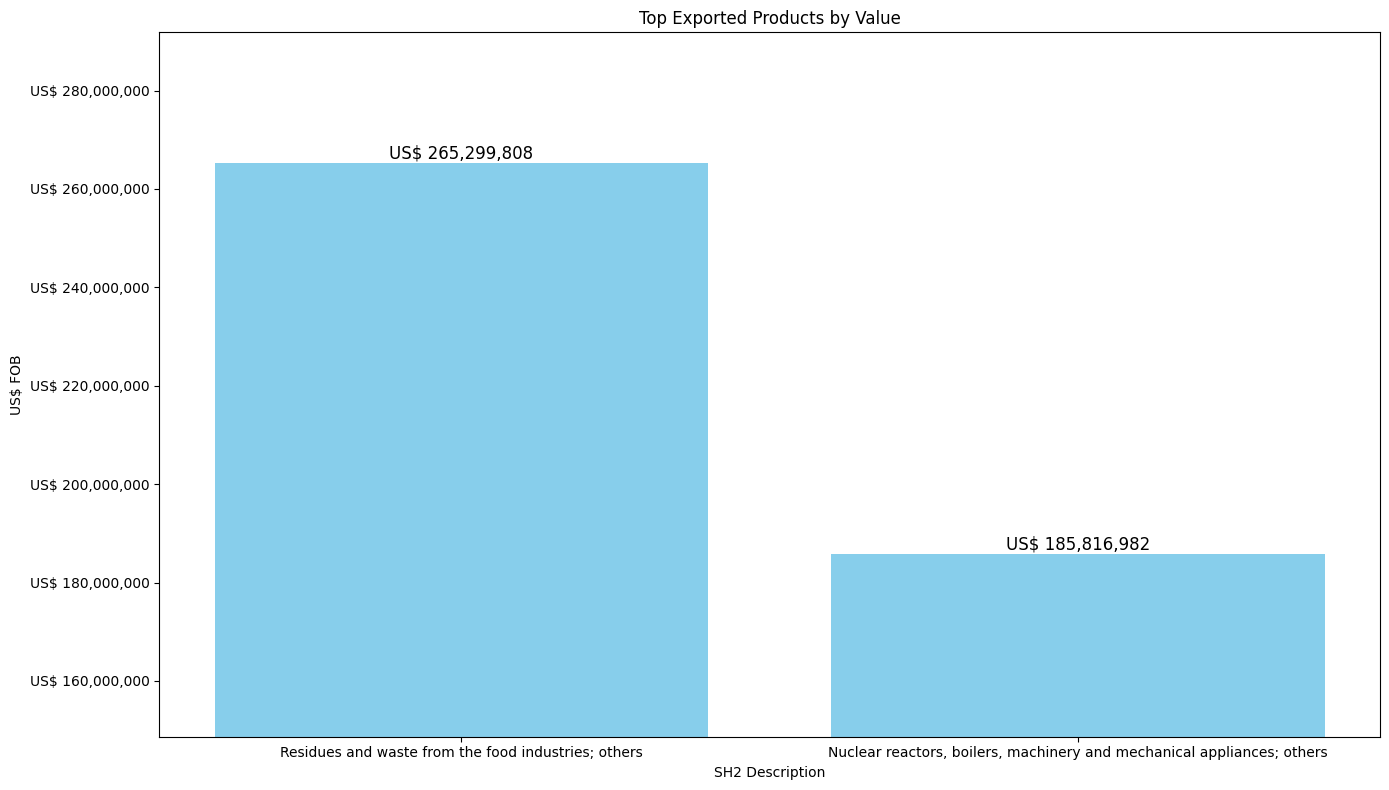

In [65]:
# Plotando o gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(most_exported_products_2020['SH2 Description'], most_exported_products_2020['US$ FOB'], color='skyblue')

# Adicionando rótulos e título
plt.xlabel('SH2 Description')
plt.ylabel('US$ FOB')
plt.title('Top Exported Products by Value')

# Formatando os valores do eixo y com vírgulas
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'US$ {x:,.0f}'))

y_max = most_exported_products_2020['US$ FOB'].max() * 1.1  # 10% acima do valor máximo para espaço extra
x_max = most_exported_products_2020['US$ FOB'].min() * 0.8  # 20% abaixo do valor mínimo para espaço extra
plt.ylim(x_max, y_max)

# Adicionando rótulos de valores formatados nas barras
for bar, value in zip(bars, most_exported_products_2020['US$ FOB']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'US$ {value:,.0f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()